# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определим рыночную стоимость объектов недвижимости. Поставленная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

Я планирую изучить и предобработать входные данные, затем, уже на очищенных данных, построить сводные таблицы, графики, чтобы ответить на поставленный вопрос.

### Шаг 1. Изучим общую информацию. 

In [2]:
import pandas as pd
from collections import Counter
from nltk.stem import SnowballStemmer 
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem

In [3]:
m = Mystem()

In [4]:
flats = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
flats.agg(['count', 'sum', 'min', 'max', 'mean']).T.sort_values('count')

,count,sum,min,max,mean
is_apartment,2775,50,False,True,0.018018
parks_nearest,8079,3.96521e+06,1,3190,490.805
ponds_nearest,9110,4.71881e+06,13,1344,517.981
balcony,12180,14008,0,5,1.15008
ceiling_height,14504,40197.8,1,100,2.7715
airports_nearest,18157,5.22807e+08,0,84869,28793.7
cityCenters_nearest,18180,2.57997e+08,181,65968,14191.3
ponds_around3000,18181,14004,0,3,0.770255
parks_around3000,18181,11116,0,3,0.611408
days_exposition,20518,3.71147e+06,1,1580,180.889


In [8]:
flats.shape

(23699, 22)

In [9]:
len(flats['locality_name'].unique())

365

In [10]:
flats['locality_name'].unique()[:10]

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово'], dtype=object)

### Вывод

Мы имеем таблицу с 23699 примерами и 22 признаками. Столбцы имеют пустые значения. Данные представленны за период с 2014-11-27 по 2019-05-03. Присутствуют данные о квартирах из 365 населенных пунктов. Предположим причины пропусков в данных.


- На мой взгляд, отсутствие значения в столбце is_apartment означает, что эта квартира не является аппартаментами, заменим на 0.
- Отсутствие значения в столбцах ponds_around3000, parks_around3000 означает, что эти объекты инфраструктуры рядом с квартирой отсутствуют.
- Столбец balcony так же содержит пустые значения,скорее всего у квартиры нет балкона, заменим на 0.
- Отсутствик ceiling_height означает, что это либо техническая ошибка, либо люди не указали. Заменим на среднее по locality_name и floors_total. Так же можно было использовать параметр даты постройки для этого, но у нас нет этих данных.
- Отсутствие полей cityCenters_nearest, ponds_nearest, parks_nearest, airports_nearest похоже на техническую ошибку. 
- Пропуски в days_exposition - техническая ошибка.
- kitchen_area, living_area, floors_total, locality_name - это данные, вводимые пользователем, скорее всего были пропущены при заполнении объявления.

Наверняка есть еще ошибки в данных, в процессе работы рассмотрим каждый столбец в отдельности.


### Шаг 2. Предобработка данных

### Обработка пропусков

Посмотрим сколько процентов данных пропущено по каждому столбцу

In [11]:
nulls = flats.isnull().sum() / len(flats)
(nulls.sort_values(ascending=False) * 100).round(2)

is_apartment            88.29
parks_nearest           65.91
ponds_nearest           61.56
balcony                 48.61
ceiling_height          38.80
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
ponds_around3000        23.28
days_exposition         13.42
kitchen_area             9.61
living_area              8.03
floors_total             0.36
locality_name            0.21
first_day_exposition     0.00
last_price               0.00
total_area               0.00
studio                   0.00
rooms                    0.00
floor                    0.00
open_plan                0.00
total_images             0.00
dtype: float64

#### Поработаем со столбцом locality_name

In [12]:
flats['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [13]:
flats['locality_name'].nunique()

364

In [14]:
flats['locality_name'].isnull().sum()

49

Удалим записи в которых нет информации о локации

In [15]:
flats = flats[flats['locality_name'].notnull()]

Можно заметить что есть проблемы с буквами е и ё.
Есть населенные пункты с одним названием, но разными типами:

    поселок Мурино и Мурино
    деревня Кудрово и Кудрово
    поселок Любань и Любань

Заменим ё на е и посмотрим, изменится ли количество ункальных населенных пунктов

In [16]:
def replace_letters(value):
    return value.replace('ё', 'е')
flats['locality_name'] = flats['locality_name'].apply(replace_letters)

In [17]:
flats['locality_name'].nunique()

330

Получается было 34 дубликата

In [18]:
words = dict()
for name in flats['locality_name'].sort_values().unique():
    for word in name.split():
        if word in words:
            words[word] += 1
        else:
            words[word] = 1
sorted(words.items(), key=lambda kv: -kv[1])

[('поселок', 167),
 ('деревня', 106),
 ('городского', 30),
 ('типа', 30),
 ('городской', 13),
 ('село', 9),
 ('станции', 8),
 ('Бор', 6),
 ('товарищество', 5),
 ('Большая', 4),
 ('Старая', 4),
 ('садовое', 4),
 ('Павлово', 3),
 ('коттеджный', 3),
 ('Кудрово', 2),
 ('Любань', 2),
 ('Мурино', 2),
 ('Никольское', 2),
 ('Новая', 2),
 ('Ладога', 2),
 ('Ижора', 2),
 ('Лесогорский', 2),
 ('Мга', 2),
 ('Назия', 2),
 ('Рощино', 2),
 ('Советский', 2),
 ('Федоровское', 2),
 ('Бегуницы', 2),
 ('Колпаны', 2),
 ('Гарболово', 2),
 ('Зимитицы', 2),
 ('Калитино', 2),
 ('Романовка', 2),
 ('Малое', 2),
 ('Рабитицы', 2),
 ('Щеглово', 2),
 ('Лесное', 2),
 ('Громово', 2),
 ('Красная', 2),
 ('Новый', 2),
 ('Ропша', 2),
 ('Рябово', 2),
 ('Горка', 2),
 ('Приладожский', 2),
 ('Рахья', 2),
 ('имени', 2),
 ('при', 2),
 ('железнодорожной', 2),
 ('Вещево', 2),
 ('Приветнинское', 2),
 ('Бокситогорск', 1),
 ('Волосово', 1),
 ('Волхов', 1),
 ('Всеволожск', 1),
 ('Выборг', 1),
 ('Высоцк', 1),
 ('Гатчина', 1),
 ('Зелено

Возможно, "поселок городского типа" и "городской поселок" это одно и тоже, попробуем заменить.

In [19]:
def replace_phrase(value):
    return value.replace('городской поселок ', 'поселок городского типа ')
flats['locality_name'] = flats['locality_name'].apply(replace_phrase)

In [20]:
flats['locality_name'].nunique()

323

Было 7 дубликатов, посмотрим, может еще что-нибудь есть. Ниже приведены некоторые слова встречающиеся в названиях населенных пунктов дважды.

In [21]:
doubles = ['Кудрово', 'Любань', 'Мурино', 'Никольское', 
           'Ладога', 'Бегуницы', 'Колпаны', 
           'Гарболово', 'Зимитицы', 'Калитино', 
           'Романовка', 'Рабитицы', 'Федоровское', 
           'Щеглово', 'Лесное', 'Громово', 'Красная', 
           'Ропша', 'Рябово', 'Горка', 'Павлово', 
           'Приладожский', 'Рахья', 'Вещево', 'Приветнинское']
localities = flats['locality_name'].sort_values().unique()

for word in doubles:
    for name in localities: 
        if word in name:
            print(f'{word} - {name}')

Кудрово - Кудрово
Кудрово - деревня Кудрово
Любань - Любань
Любань - поселок Любань
Мурино - Мурино
Мурино - поселок Мурино
Никольское - Никольское
Никольское - село Никольское
Ладога - Новая Ладога
Ладога - село Старая Ладога
Бегуницы - деревня Бегуницы
Бегуницы - деревня Старые Бегуницы
Колпаны - деревня Большие Колпаны
Колпаны - деревня Малые Колпаны
Гарболово - деревня Гарболово
Гарболово - поселок Гарболово
Зимитицы - деревня Зимитицы
Зимитицы - поселок Зимитицы
Калитино - деревня Калитино
Калитино - поселок Калитино
Романовка - деревня Малая Романовка
Романовка - поселок Романовка
Рабитицы - деревня Рабитицы
Рабитицы - поселок Рабитицы
Федоровское - деревня Федоровское
Федоровское - поселок городского типа Федоровское
Щеглово - деревня Щеглово
Щеглово - поселок Щеглово
Лесное - коттеджный поселок Лесное
Лесное - поселок Лесное
Громово - поселок Громово
Громово - поселок станции Громово
Красная - поселок Красная Долина
Красная - поселок Форт Красная Горка
Ропша - поселок Ропша
Роп

Можно разобраться и выяснить, что является актуальным названием населенного пункта, но это выходит за эту работу, так что оставлю все как есть.

#### Исследуем столбец floors_total

In [22]:
print(flats['floors_total'].isna().sum())
flats['floors_total'].describe()

85


count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [23]:
flats[flats['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [24]:
flats['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Не вижу в данных никаких аномалий. Строки с пропусками можно удалить, их не много(85).
Но удалять данные не всегда лучшее решение. В наших данныю нет пропусков в столбце floor. Заполним пропуски в столбце floors_total данными из столбца floor. Тогда получится, что квартира находится на последнем этаже.

In [25]:
flats['floors_total'] = flats['floors_total'].fillna(flats['floor'])
flats['floors_total'] = flats['floors_total'].astype(int)

#### Исследуем столбец is_apartment

In [26]:
flats['is_apartment'].unique()

array([nan, False, True], dtype=object)

На мой взгляд, отсутствие значения в столбце is_apartment означает, что эта квартира не является аппартаментами, заменим на False. Видно, что значения в нужно привести к типу int. 

In [27]:
flats['is_apartment'].fillna(False, inplace=True)
flats['is_apartment'] = flats['is_apartment'].astype(int)

#### Исследуем столбец is_apartment

In [28]:
flats['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Столбец balcony так же содержит пустые значения, скорее всего у квартиры нет балкона, заменим на 0 и приведем тип к int.

In [29]:
flats['balcony'].fillna(0, inplace=True)
flats['balcony'] = flats['balcony'].astype(int)

#### Рассмотрим поля связанные с расстояниями до объектов инфраструктуры parks_around3000, ponds_around3000

In [30]:
print(flats['parks_around3000'].describe(), end='\n\n')
print(flats['ponds_around3000'].describe())

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


Данные выглядят хорошо, выбросов или странных значений не видно.
Проверим гипотезу о том, что отсутствие расстояние = отсутствие обекта инфраструктуры.

In [31]:
print(flats[flats['parks_nearest'].isnull()]['parks_around3000'].unique())
print(flats[flats['ponds_nearest'].isnull()]['ponds_around3000'].unique())

[ 0. nan]
[ 0. nan]


Да, всё верно, объекты отсутствую. Заменим пустые значения в parks_around3000 на 0 и приведем к типу int

In [32]:
flats['parks_around3000'].fillna(0, inplace=True)
flats['ponds_around3000'].fillna(0, inplace=True)
flats['parks_around3000'] = flats['parks_around3000'].astype(int)
flats['ponds_around3000'] = flats['ponds_around3000'].astype(int)

Отсутсвие значений в полях parks_nearest, ponds_nearest, airports_nearest несет в себе важную часть информации, оставим эти стосбцы незаполненными.

#### Исследуем поле ceiling_height

In [33]:
print(len(flats['ceiling_height'].unique()))
flats['ceiling_height'].describe()

184


count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что уникальных значений не много(184). Так же можно заметить, что высота потолков бывает от 1 до 100 метров, что не возможно. Предположим, что есть старые постройки или самострой и установим границы от 2 до 4 метров. Взгляним на эти странные объекты.

In [34]:
flats[flats['ceiling_height'] > 4].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3,44.2,2,0,...,12.2,0,Санкт-Петербург,20562.0,3167.0,2,344.0,1,838.0,38.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5,32.0,2,0,...,NaN,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8,159.5,7,0,...,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3,190.0,3,0,...,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3,NaN,1,0,...,NaN,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,6.0
1129,20,6695000.0,36.9,2018-09-28T00:00:00,1,4.06,5,22.0,2,0,...,7.2,0,Санкт-Петербург,21725.0,2990.0,1,596.0,1,866.0,110.0
1300,14,120000000.0,280.0,2018-07-12T00:00:00,5,4.70,4,162.0,3,0,...,30.0,0,Санкт-Петербург,24680.0,4247.0,1,464.0,3,339.0,225.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6,NaN,6,0,...,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
2639,17,4850000.0,59.7,2017-11-18T00:00:00,3,4.19,5,46.3,4,0,...,6.4,1,Санкт-Петербург,42964.0,15468.0,0,NaN,0,NaN,60.0
2802,7,14950000.0,50.0,2016-03-06T00:00:00,2,4.80,3,30.0,2,0,...,10.0,0,Санкт-Петербург,24433.0,1725.0,1,589.0,3,161.0,160.0


Можно предположить, что человек просто ошибся и поставил точку не там: потолки высотой 2.5, а он написал 25. Можно попробовать решить эту проблему. Но сначало взглянем на то сколько таких примеров и если меньше 1 процента, удалим.

In [35]:
bad_ceiling_height = 'ceiling_height <= 2 or ceiling_height >= 4'
good_ceiling_height = 'ceiling_height > 2 and ceiling_height < 4'
flats.query(bad_ceiling_height).shape[0] / flats.shape[0] * 100

0.5369978858350951

Посмотрим на группировку обектов по этажности домов

In [36]:
flats.query(good_ceiling_height).groupby('floors_total')['ceiling_height'].agg(['min', 'max', 'mean'])

,min,max,mean
floors_total,,,
1,2.30,3.00,2.740000
2,2.20,3.80,2.780337
3,2.50,3.95,2.854872
4,2.40,3.98,2.927529
5,2.25,3.95,2.696303
6,2.40,3.95,3.050314
7,2.45,3.90,2.916513
8,2.40,3.70,2.839450
9,2.30,3.90,2.580204


Заменим пропуски средней высотой потолков, расчитанной по этажности дома. Потом округлим значения до 2-х знаков после запятой.

In [37]:
group_by_floors_total = flats[
    (flats['ceiling_height'] > 2) & (flats['ceiling_height'] < 4)
].groupby('floors_total')['ceiling_height'].mean()

mean_ceiling_height = flats[(flats['ceiling_height'] > 2) & (flats['ceiling_height'] < 4)].mean()['ceiling_height']

def fill_ceiling_height(row):
    # Не получилось сравнивать с np.nan
    # NaN < 0
    if row['ceiling_height'] > 0:
        return row['ceiling_height']
    elif row['floors_total'] in group_by_floors_total:
        return group_by_floors_total[row['floors_total']]
    else:
        return mean_ceiling_height
    
flats['ceiling_height'] = flats.apply(fill_ceiling_height, axis=1)
flats['ceiling_height'] = flats['ceiling_height'].round(2)

Проверим, что замена прошла успешно

In [38]:
flats['ceiling_height'].unique()

array([  2.7 ,   2.78,   2.64,   3.03,   2.67,   2.74,   2.68,   2.5 ,
         2.56,   3.05,   2.71,   2.75,   2.6 ,   2.85,   2.9 ,   2.58,
         2.8 ,   2.55,   3.  ,   2.73,   2.65,   2.93,   3.2 ,   2.72,
         2.61,   3.25,   3.45,   2.77,   2.57,   4.15,   3.5 ,   2.92,
         3.3 ,   4.  ,   2.47,   2.84,   3.1 ,   2.34,   3.4 ,   3.06,
         2.54,   2.51,   2.59,   2.76,  25.  ,   3.7 ,   2.52,   5.2 ,
         2.87,   2.66,   2.  ,   2.45,   3.6 ,   3.11,   3.13,   3.8 ,
         3.15,   3.55,   3.16,   3.62,   3.12,   2.53,   2.96,   2.46,
         5.3 ,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,
         3.53,   2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,
         3.9 ,   3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,
         4.2 ,   3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,
      

Удалим записи с очень высокими и очень низкими потолками

In [39]:
flats = flats.query(good_ceiling_height)

In [40]:
print(flats.shape)

(23523, 22)


Text(0.5, 1.0, 'График отношения этажности к средней высоте потолков')

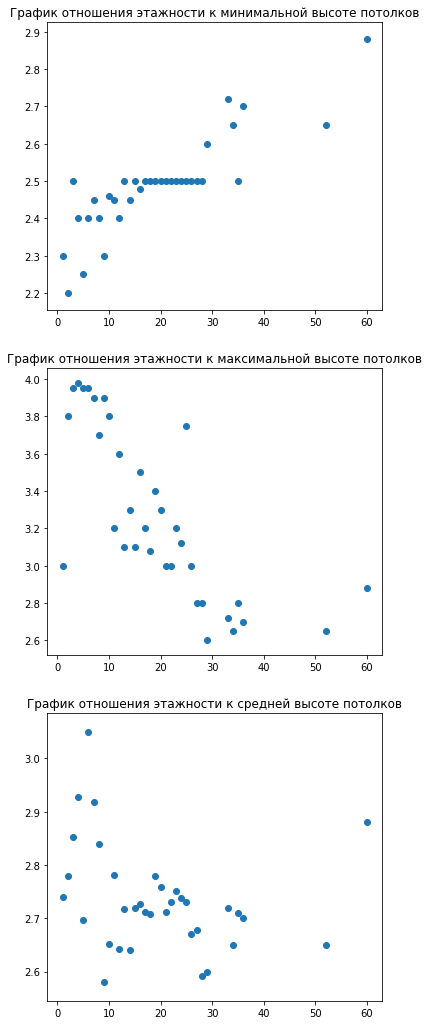

In [41]:
# Построим графики
fig, axes = plt.subplots(3, 1)
fig.set_figwidth(6)
fig.set_figheight(18)
floors_total_mins = flats.groupby('floors_total')['ceiling_height'].agg('min')
floors_total_maxs = flats.groupby('floors_total')['ceiling_height'].agg('max')
floors_total_means = flats.groupby('floors_total')['ceiling_height'].agg('mean')
floors_total_keys = flats.groupby('floors_total')['ceiling_height'].groups.keys()
axes[0].scatter(floors_total_keys, floors_total_mins);
axes[0].set_title('График отношения этажности к минимальной высоте потолков')
axes[1].scatter(floors_total_keys, floors_total_maxs);
axes[1].set_title('График отношения этажности к максимальной высоте потолков')
axes[2].scatter(floors_total_keys, floors_total_means);
axes[2].set_title('График отношения этажности к средней высоте потолков')

На графиках мы можем наблюдать пару интересных зависимостей. 

С ростом этажности растет так же и минимальная высота потолков, до "стандарта" в 2.5 метров. 

Максимальная высота потолков падает в ростом этажности. Мне кажется, что это связано со сложностью и нецелесообразностью производства высотных домов с потолками выше 2.5 метров.

#### Посмотрим на поле kitchen_area, living_area

In [42]:
print('kitchen_area\n', flats['kitchen_area'].describe(), end='\n\n')
print('living_area\n', flats['living_area'].describe())

kitchen_area
 count    21271.000000
mean        10.540088
std          5.839232
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

living_area
 count    21635.000000
mean        34.276368
std         21.509525
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64


Так как у нас есть общая площадь, мы можем из нее получить жилую площадь и площадь кухни. 

Для этого посчитаем отношение жилой площади к общей площади и отношение площади кухни к общей площади.
Затем заполним пропуски с учетом этих коэффициентов.

In [43]:
ratio_living_total_area = (flats['living_area'] / flats['total_area']).median().round(3)
ratio_kitchen_total_area = (flats['kitchen_area'] / flats['total_area']).median().round(3)

In [44]:
print('Отношение жилой и общей площади', ratio_living_total_area) 
print('Отношение площади кухни к общей', ratio_kitchen_total_area)

Отношение жилой и общей площади 0.568
Отношение площади кухни к общей 0.172


In [45]:
def fill_kitchen_area(row):
    if row['kitchen_area'] > 0:
        return row['kitchen_area']
    else:
        return row['total_area'] * ratio_kitchen_total_area
    
flats['kitchen_area'] = flats.apply(fill_kitchen_area, axis=1)
flats['kitchen_area'] = flats['kitchen_area'].round(2)

In [46]:
def fill_living_area(row):
    if row['living_area'] > 0:
        return row['living_area']
    else:
        return row['total_area'] * ratio_living_total_area

flats['living_area'] = flats.apply(fill_living_area, axis=1)
flats['living_area'] = flats['living_area'].round(2)

#### Посмотрим на столбец days_exposition

In [47]:
flats['days_exposition'].describe()

count    20373.000000
mean       180.381633
std        219.427619
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

У нас есть информация о дате публикации объявления, но информации о закрытии объявления у нас нет, так что посчитать через другие поля не получится. Заменим на медианное значение.

In [48]:
flats['days_exposition'].fillna(flats['days_exposition'].median(), inplace=True)

### Приведение типов

In [49]:
print(flats.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23523 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23523 non-null int64
last_price              23523 non-null float64
total_area              23523 non-null float64
first_day_exposition    23523 non-null object
rooms                   23523 non-null int64
ceiling_height          23523 non-null float64
floors_total            23523 non-null int64
living_area             23523 non-null float64
floor                   23523 non-null int64
is_apartment            23523 non-null int64
studio                  23523 non-null bool
open_plan               23523 non-null bool
kitchen_area            23523 non-null float64
balcony                 23523 non-null int64
locality_name           23523 non-null object
airports_nearest        18019 non-null float64
cityCenters_nearest     18039 non-null float64
parks_around3000        23523 non-null int64
parks_nearest           7999 non-null float64
ponds_around3000     

In [50]:
# Мне кажется, копейки тут не несут большого вклада, а данные будут занимать меньше места в памяти
flats['last_price'] = flats['last_price'].astype(int)
# Дни тоже логично хранить в формате int
flats['days_exposition'] = flats['days_exposition'].astype(int)

### Посмотрим количество дубликатов после всего что мы сделали с данными.

In [51]:
flats.duplicated().sum()

0

### Посмотрим, что у нас получилось

In [52]:
nulls = flats.isnull().sum() / len(flats)
print((nulls.sort_values(ascending=False) * 100).round(2))
print(flats.info())

parks_nearest           65.99
ponds_nearest           61.68
airports_nearest        23.40
cityCenters_nearest     23.31
days_exposition          0.00
floor                    0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height           0.00
floors_total             0.00
living_area              0.00
studio                   0.00
is_apartment             0.00
open_plan                0.00
kitchen_area             0.00
balcony                  0.00
locality_name            0.00
parks_around3000         0.00
ponds_around3000         0.00
total_images             0.00
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23523 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23523 non-null int64
last_price              23523 non-null int64
total_area              23523 non-null float64
first_day_exposition    23523 non-null object
rooms                   23523 non

### Вывод

Были заполнены пропуски во всех полях кроме parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest, т.к. я считаю отсутствие этих данных - это техническая ошибка или важная часть информации. Были преведены типы данных к более логичным/оптимальным. 

### Шаг 3. Добавем в таблицу новые параметры

#### Вычислим цену квадратного метра

In [53]:
flats['price_per_meter'] = flats['last_price'] / flats['total_area']
flats['price_per_meter'].describe()

count    2.352300e+04
mean     9.918558e+04
std      4.967389e+04
min      1.118349e+02
25%      7.657162e+04
50%      9.493671e+04
75%      1.140655e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64

#### Добавим столбцы с днями недели, месяцами и годами публикации объявления

In [54]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
flats['weekday_exposition'] = flats['first_day_exposition'].dt.weekday
flats['month_exposition'] = flats['first_day_exposition'].dt.month
flats['year_exposition'] = flats['first_day_exposition'].dt.year
flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,0,...,16028.0,1,482.0,2,755.0,95,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.78,11,18.60,1,0,...,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.30,4,0,...,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.64,14,90.31,9,0,...,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,0,...,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018


#### Создадим функцию для определения категории этажа - первый, последний, другой

In [55]:
def floor_categorie(row):
    if row['floor'] == 1:
        # 'Первый этаж'
        return 1
    elif row['floor'] == row['floors_total']:
        # 'Последний этаж'
        return 3
    else:
        # 'Другой'       
        return 2

In [56]:
flats['floor_categorie'] = flats.apply(floor_categorie, axis=1)

In [57]:
flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_categorie
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,0,...,1,482.0,2,755.0,95,120370.370370,3,3,2019,2
1,7,3350000,40.4,2018-12-04,1,2.78,11,18.60,1,0,...,0,NaN,0,NaN,81,82920.792079,1,12,2018,1
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.30,4,0,...,1,90.0,2,574.0,558,92785.714286,3,8,2015,2
3,0,64900000,159.0,2015-07-24,3,2.64,14,90.31,9,0,...,2,84.0,3,234.0,424,408176.100629,4,7,2015,2
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,0,...,2,112.0,1,48.0,121,100000.000000,1,6,2018,2


#### Добавим столбцы соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [58]:
flats['ratio_living_total_area'] = flats['living_area'] / flats['total_area']
flats['ratio_kitchen_total_area'] = flats['kitchen_area'] / flats['total_area']

### Вывод

Были посчитаны и добавлены в таблицу следующие поля:
*  цену квадратного метра;
*  день недели, месяц и год публикации объявления;
*  этаж квартиры; варианты — первый(1), последний(3), другой(2); 
*  соотношение жилой и общей площади, а также отношение площади кухни к общей.


### Шаг 4. Исследовательский анализ данных.

Изучим подробнее следующие параметры: площадь, цена, число комнат, высота потолков. 
Взглянем на гистограммы для каждого параметра.

### Общая площадь (total_area)

In [59]:
flats['total_area'].describe()

count    23523.000000
mean        60.077867
std         34.897059
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

Видно, что площад имеет длинный "хвост", последняя квартиль от 70 до 900 метров квадратных... 

Медиана площадей - 52 м.кв.
IQR = 19.5

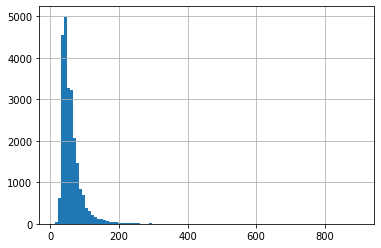

In [60]:
flats['total_area'].hist(bins=100);

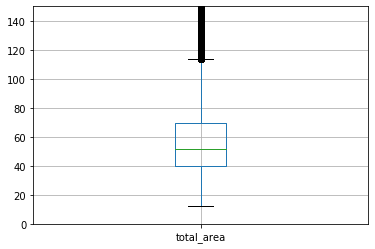

In [61]:
plt.ylim(0, 150)
flats.boxplot('total_area')
plt.show()

Это так же подтверждается на диаграмме. Основная масса квартир имеет площадь до 120 м.кв. - 95.5 %

In [62]:
flats[flats['total_area'] < 120].shape[0] / flats.shape[0]

0.9547676741912171

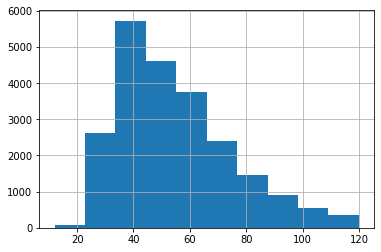

In [63]:
flats.query('total_area >= 12 and total_area <= 120')['total_area'].hist()
plt.show()

Можно сделать вывод, что нас интересует диапазон площади: 12 – 120 кв.м.

### Последняя цена (last_price)

In [64]:
flats['last_price'].describe()

count    2.352300e+04
mean     6.472063e+06
std      1.068895e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.610000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

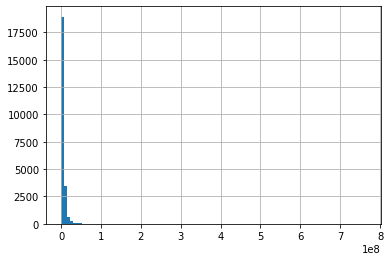

In [65]:
flats['last_price'].hist(bins=100);

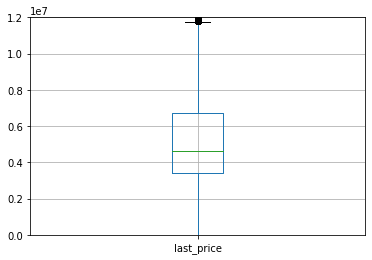

In [66]:
plt.ylim(0, 1.2e+07)
flats.boxplot('last_price')
plt.show()

In [67]:
flats[flats['last_price'] < 15e+06].shape[0] / flats.shape[0]

0.948816052374272

* Основная масса квартир стоит до 15 млн - 95%.
* Минимальная стоимость объекта недвижимости составляет 12 190
* Медианая стоимость 4 610 000
* Средняя стоимость 6 470 000, можно заметить на этих данных как разнится среднее и медианное значение.

In [68]:
flats.query('last_price < 4.5e+5').sort_values('last_price')[['locality_name', 'last_price', 'total_area']].head(10)

,locality_name,last_price,total_area
8793,Санкт-Петербург,12190,109.0
14911,поселок станции Свирь,430000,54.0
17456,Сланцы,430000,30.4
16274,деревня Старополье,440000,40.0


Видно, что с первым объектом что-то не так. Значит минимальная стоимость недвижимости 430 000

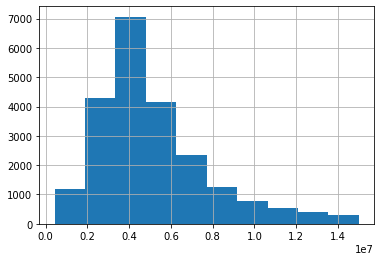

In [69]:
flats.query('last_price >= 430_000 and last_price <= 15_000_000')['last_price'].hist()
plt.show()

### Количество комнат (rooms)

In [70]:
flats['rooms'].describe()

count    23523.000000
mean         2.066573
std          1.074429
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

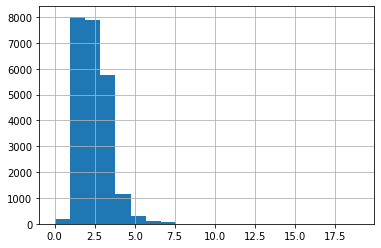

In [71]:
flats['rooms'].hist(bins=20);

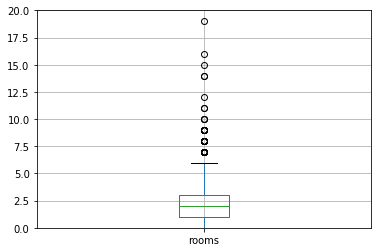

In [72]:
plt.ylim(0, 20)
flats.boxplot('rooms')
plt.show()

In [73]:
flats[flats['rooms'] <= 4].shape[0] / flats.shape[0]

0.9786591846278111

* Основная масса квартир имеет меньше 5 комнат - 98%.
* Также можем набдюдать длинный хвост у гистаграммы.
* Минимальное количество комнат 0, что несколько странно, возможно это студии
* Медианное количество комнат 2

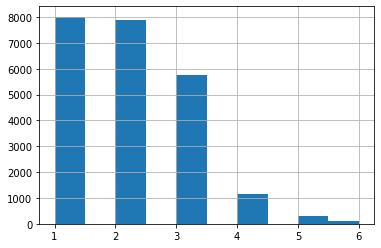

In [74]:
flats.query('rooms >= 1 and rooms <= 6')['rooms'].hist()
plt.show()

In [75]:
flats.query('rooms == 0').shape[0]

195

In [76]:
flats.query('rooms == 0 and studio == True').shape[0]

137

Хорошо, 137 из 195 обектов это студии, я думаю можно поставить в поле rooms 1

In [77]:
flats.query('rooms == 0 and studio == False')[
    ['total_area', 'floors_total', 'balcony', 'price_per_meter']
].describe()

,total_area,floors_total,balcony,price_per_meter
count,58.000000,58.000000,58.000000,58.000000
mean,32.840172,17.431034,1.224138,104860.864527
std,45.367479,6.880208,0.859276,26636.461942
min,16.000000,4.000000,0.000000,48133.235725
25%,25.000000,12.000000,0.000000,90640.350358
50%,26.450000,18.000000,1.500000,103253.968254
75%,28.275000,24.000000,2.000000,121886.446886
max,371.000000,35.000000,2.000000,191374.663073


Оставшиеся квартиры так же можно считать студиями из-за очень маленькой площади, хотя и тут есть исключения.

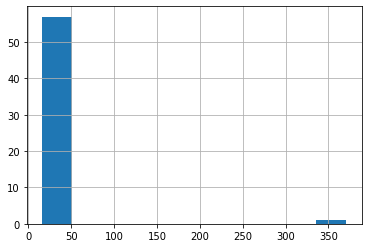

In [78]:
flats.query('rooms == 0 and studio == False')['total_area'].hist(bins=10);

In [79]:
flats.query('rooms == 0 and studio == False and total_area > 200').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_categorie,ratio_living_total_area,ratio_kitchen_total_area
19392,5,71000000,371.0,2018-07-26,0,3.57,7,210.73,6,0,...,1,584.0,90,191374.663073,3,7,2018,2,0.568005,0.171995


### Высота потолков (ceiling_height)

In [80]:
flats['ceiling_height'].describe()

count    23523.000000
mean         2.719660
std          0.205183
min          2.200000
25%          2.580000
50%          2.700000
75%          2.770000
max          3.980000
Name: ceiling_height, dtype: float64

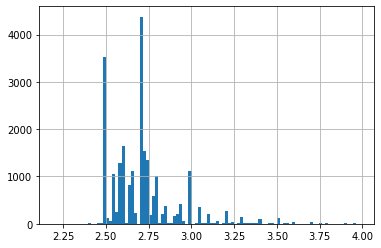

In [81]:
flats['ceiling_height'].hist(bins=100);

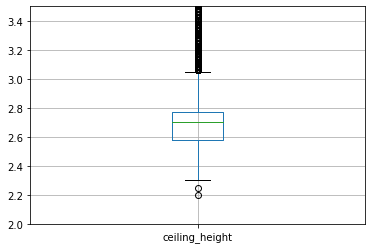

In [82]:
plt.ylim(2, 3.5)
flats.boxplot('ceiling_height')
plt.show()

По данным из гистограммы и boxplot мы можем сказать:
*  Медианная высота потолка 2.7 метра
*  После того как мы очистили данные от квартир с высотой потолков меньше 2-х метров и больше 4 мы не видим каких-то больших отклонений
*  Можно заметить, что уже после 3 метров наблюдается длинный хвост, изначально он был до 100 метров. 
*  В разделе предобработка данных было приведено несколько графиков

### Посмотрим внимательнее на параметр время продажи квартиры (days_exposition)

Построим гистограммы, посчитаем среднее и медиану, опишем, сколько обычно занимает продажа. Введем такие понятия как "очень быстрая продажа" и "необычно долгая продажа".

In [83]:
flats['days_exposition'].describe()

count    23523.000000
mean       168.948051
std        206.267056
min          1.000000
25%         45.000000
50%         95.000000
75%        197.500000
max       1580.000000
Name: days_exposition, dtype: float64

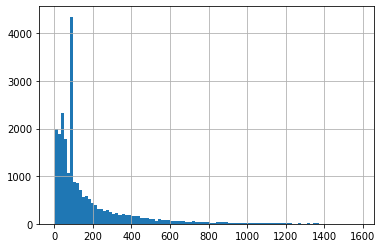

In [84]:
flats['days_exposition'].hist(bins=100);

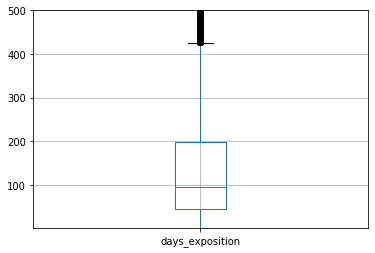

In [85]:
plt.ylim(1, 500)
flats.boxplot('days_exposition')
plt.show()

In [86]:
flats[flats['days_exposition'] < 420].shape[0] / flats.shape[0]

0.898142243761425

In [87]:
flats[flats['days_exposition'] < 20].shape[0] / flats.shape[0]

0.09981720018705097

* Медиана времени продожи на 95 дней
* В среднем продажа квартиры длится 169 дней
* Обычно продача занимает не более 400 дней (90% продаж). Все что более можно считать "необычно долгой продажей"
* С другой стороны "необычно быстрой продажей" можно считать те, что завершились быстрее 20 дней

### Поработаем с выбросами

На этапе предобработки данных мы уже очистили данные от очевидных выбросов, остальные же выбросы нужно удалять вводя определенные границы, которые удобны бизнесу. 

Поэтому тут я удалю всего пару очевидных выбросов.

In [88]:
print('Странный объект с 0 комнат количество:', 
      flats.query('rooms == 0 and studio == False and total_area > 300').shape[0])
indexes = flats.query('rooms == 0 and studio == False and total_area > 300').index
flats.drop(indexes , inplace=True)

Странный объект с 0 комнат количество: 1


При работе с комнатами мы заметили, что 0 комнат имеют очень маленькие квартиры либо со статусом студии.
Я думаю, что будет разумно проставить этим квартирам статус студии. Еще я считаю, что квартиры - студии все-таки имеют одну комнату, поэтому я заменю 0 комнат на 1 комнату.

In [89]:
indexes = flats.query('rooms == 0 and studio == False').index
flats['studio'].unique()

array([False,  True])

In [90]:
indexes = flats.query('rooms == 0 and studio == False').index
flats.loc[indexes, ['studio']] = flats.loc[indexes, ['studio']].replace(False, True)

In [91]:
indexes = flats.query('rooms == 0').index
flats.loc[indexes, ['rooms']] = flats.loc[indexes, ['rooms']].replace({0: 1})

In [92]:
flats['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [93]:
print('Неправдоподобно большие объекты количество:', 
      flats.query('total_area > 250').shape[0])
indexes = flats.query('total_area > 250').index
flats.drop(indexes , inplace=True)

Неправдоподобно большие объекты количество: 100


In [94]:
print('Слишком много комнат количество:', 
      flats.query('rooms > 6').shape[0])
indexes = flats.query('rooms > 6').index
flats.drop(indexes , inplace=True)

Слишком много комнат количество: 51


In [95]:
print('Слишком дорогие объекты количество:', 
      flats.query('last_price > 4e+7').shape[0])
indexes = flats.query('last_price > 4e+7').index
flats.drop(indexes , inplace=True)

Слишком дорогие объекты количество: 109


### Изучим факторы, влияющие на стоимость недвижимости

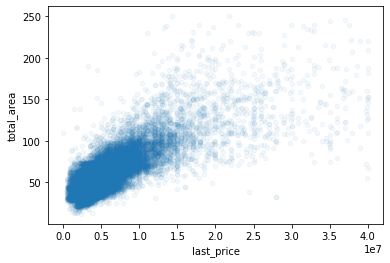

Корреляция между стоимостью квартиры и общей площадью 0.781


In [96]:
flats.plot(x='last_price', y='total_area', kind='scatter', alpha=0.05)
plt.show()
print('Корреляция между стоимостью квартиры и общей площадью', 
      flats['last_price'].corr(flats['total_area']).round(3))

Зависимость между количеством метров и общей ценой наблюдается прямая, это логично: чем больше метров, тем выше стоимость объекта недвижимости.

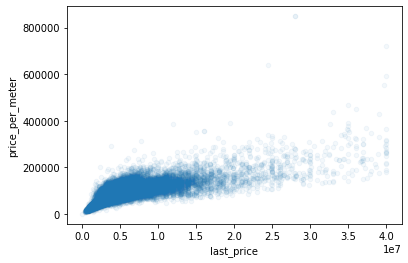

Корреляция между стоимостью квартиры и ценой за квадратный метр 0.696


In [97]:
flats.plot(x='last_price', y='price_per_meter', kind='scatter', alpha=0.05)
plt.show()
print('Корреляция между стоимостью квартиры и ценой за квадратный метр', 
      flats['last_price'].corr(flats['price_per_meter']).round(3))

Зависимость довольно высокая и тоже прямая, но не такая явная как в случае с общей площадью.

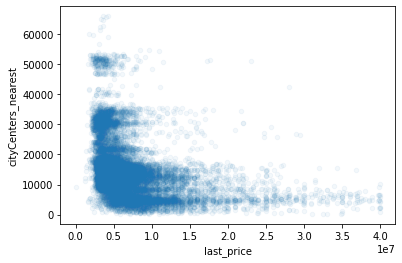

Корреляция между стоимостью квартиры и удаленностью от центра -0.337


In [98]:
flats.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.05)
plt.show()
print('Корреляция между стоимостью квартиры и удаленностью от центра', 
      flats['last_price'].corr(flats['cityCenters_nearest']).round(3))

Корреляция не высокая и отрицательная, это означает, что чем дальше мы от центра тем дешевле недвижимость.

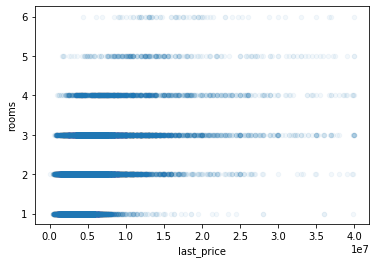

Корреляция между стоимостью квартиры и числа комнат 0.488


In [99]:
flats.plot(x='last_price', y='rooms', kind='scatter', alpha=0.05)
plt.show()
print('Корреляция между стоимостью квартиры и числа комнат', 
      flats['last_price'].corr(flats['rooms']).round(3))

Корреляция прямая и высокая, можно заметить, что количество комнат влияет на цену больше, чем удаленность от центра.

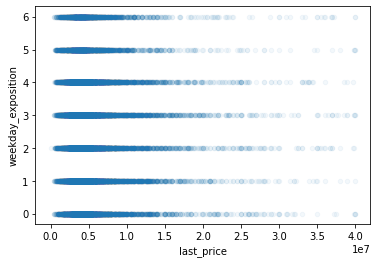

Корреляция между стоимостью квартиры и днем размещения объявления -0.011


In [100]:
flats.plot(x='last_price', y='weekday_exposition', kind='scatter', alpha=0.05)
plt.show()
print('Корреляция между стоимостью квартиры и днем размещения объявления', 
      flats['last_price'].corr(flats['weekday_exposition']).round(3))

Корреляции не наблюдается. Распределение примерно равномерное. Продажа недвижимости дело серьезное, врядли будет зависить от дня, в котором было размещено объявление.

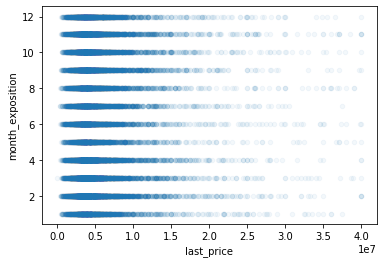

Корреляция между стоимостью квартиры и месяц размещения 0.003


In [101]:
flats.plot(x='last_price', y='month_exposition', kind='scatter', alpha=0.05)
plt.show()
print('Корреляция между стоимостью квартиры и месяц размещения', 
      flats['last_price'].corr(flats['month_exposition']).round(3))

Тут корреляция также не наблюдается. Я ожидала, что тут будет зависимость, т.е. есть сезонность, увеличение и уменьшение цены.

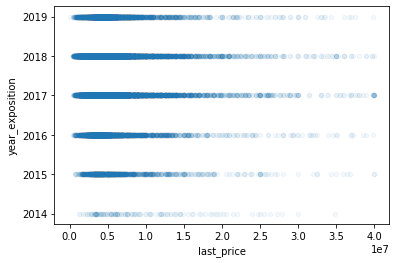

Корреляция между стоимостью квартиры и годом создания объявления -0.038


In [102]:
flats.plot(x='last_price', y='year_exposition', kind='scatter', alpha=0.05)
plt.show()
print('Корреляция между стоимостью квартиры и годом создания объявления', 
      flats['last_price'].corr(flats['year_exposition']).round(3))

Корреляция не наблюдается. В последние годы не было сильных кризисов или потрясений.

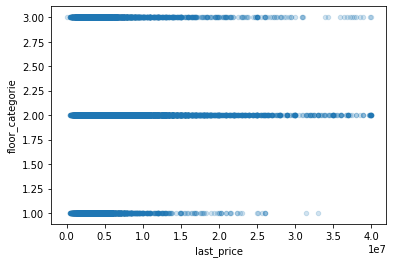

Корреляция между стоимостью квартиры и категорией этажа(первый, последний, другой) 0.058


In [103]:
flats.plot(x='last_price', y='floor_categorie', kind='scatter', alpha=0.2)
plt.show()
print('Корреляция между стоимостью квартиры и категорией этажа(первый, последний, другой)', 
      flats['last_price'].corr(flats['floor_categorie']).round(3))

### Посмотрим на остальные корреляции, может есть что-нибудь интересное.

In [104]:
corr = flats.corr()
corr['last_price'].sort_values(ascending=False)[1:].round(2)

total_area                  0.78
price_per_meter             0.70
living_area                 0.68
kitchen_area                0.62
rooms                       0.49
ceiling_height              0.42
ponds_around3000            0.29
parks_around3000            0.28
total_images                0.15
days_exposition             0.09
floor                       0.07
floors_total                0.06
floor_categorie             0.06
balcony                     0.04
parks_nearest               0.02
is_apartment                0.02
month_exposition            0.00
ratio_living_total_area     0.00
weekday_exposition         -0.01
open_plan                  -0.03
airports_nearest           -0.03
year_exposition            -0.04
studio                     -0.06
ratio_kitchen_total_area   -0.09
ponds_nearest              -0.11
cityCenters_nearest        -0.34
Name: last_price, dtype: float64

### Вывод
Подведем итоги по корреляциям с ценой.
Самое большое влияние на цену оказывает площадь недвижимости (0.78) и различные производные от нее - цена за метр(0.7), жилая площадь(0.68), площадь кухни(0.62), количество комнат(0.49). 
Высота потолков тоже вносит большой вклад(0.42).

После характеристик всевозможных размеров квартиры идут удаленность от мест проведения досуга: ponds_around3000(0.29) и parks_around3000(0.28).

Высокая отрицательная корреляция с удаленностью от центра(-0.34), многие хотят жить ближе к центру.

Интересно, что корреляция с количеством фотографий(0.15) делает больший вклад, чем признак числа балконов или этажа.

In [105]:
# Посмотрим в каких городах продают больше всего недвижимости
interesting_locality = flats.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)[:10]
interesting_locality

locality_name
Санкт-Петербург      15372
поселок Мурино         554
поселок Шушары         440
Всеволожск             395
Пушкин                 365
Колпино                337
поселок Парголово      326
Гатчина                305
деревня Кудрово        299
Выборг                 233
Name: locality_name, dtype: int64

Как и ожидалось, основная часть объявлений размещена на объекты в Санкт-Петербурге. Рассчитаем среднюю стоимость квадратного метра в этих населенных пунктах.

In [106]:
locality_names = list(interesting_locality.index)
flats.query(f'locality_name in {locality_names}').shape

(18626, 29)

In [107]:
most_pop_localities = flats.query(f'locality_name in {locality_names}').groupby('locality_name')
mean_price_per_meter = most_pop_localities['price_per_meter'].mean()
mean_price_per_meter.sort_values(ascending=False)

locality_name
Санкт-Петербург      111591.832245
Пушкин               102780.444077
деревня Кудрово       92473.547576
поселок Парголово     90332.263023
поселок Мурино        85656.214377
поселок Шушары        78677.364217
Колпино               75333.295801
Гатчина               68811.372828
Всеволожск            68617.058829
Выборг                58250.660654
Name: price_per_meter, dtype: float64

Населённый пункт с самой высокой стоимостью жилья это Санкт-Петербург и с самой низкой стоимостью жилья это Выборг, почти в 2 раза дешевле. Этот вывод действителен только для 10 самых популянрных населенных пунктов.

#### Рассмотрим подробнее зависимость цены квартиры от ее удаленности от центра на примере Санкт-Петербурга.

In [108]:
spb_flats = flats.query('(locality_name == "Санкт-Петербург") and (cityCenters_nearest > 0)').copy()

In [109]:
# Создадим столбец, в котором сохраним расстояние до центра в километрах
spb_flats['cityCenters_nearest_km'] = spb_flats['cityCenters_nearest'].apply(lambda x: round(x / 1000))

In [110]:
# Сгруппируем квартиры по расстоянию до центра и посмотрим как изменяется цена
mean_price_for_km = spb_flats.groupby('cityCenters_nearest_km')['last_price'].mean()
mean_price_for_km

cityCenters_nearest_km
0     1.636809e+07
1     1.197091e+07
2     1.151183e+07
3     9.771651e+06
4     1.084135e+07
5     1.120026e+07
6     1.052192e+07
7     1.066519e+07
8     8.969092e+06
9     6.907852e+06
10    6.412095e+06
11    6.119239e+06
12    5.789760e+06
13    6.068698e+06
14    5.587693e+06
15    5.843724e+06
16    5.367758e+06
17    5.217044e+06
18    4.904778e+06
19    5.037675e+06
20    5.944080e+06
21    5.493469e+06
22    5.415524e+06
23    4.851274e+06
24    3.854430e+06
25    4.052840e+06
26    3.973013e+06
27    8.300000e+06
28    5.026429e+06
29    4.236667e+06
Name: last_price, dtype: float64

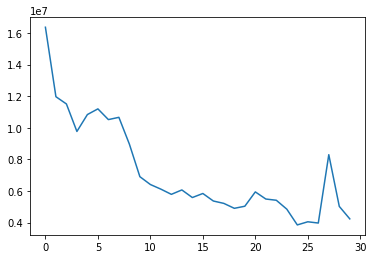

In [111]:
plt.plot(mean_price_for_km.index, mean_price_for_km);

Как мы можем наблюдать на графике, цена действительно падает по мере удаления от центра, есть какие-то странности на 27 километре, там цена в 2 раза выше, чем у соседей, возможно там уже другой город или заповедник. Проверим.

In [112]:
spb_flats.query('cityCenters_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_categorie,ratio_living_total_area,ratio_kitchen_total_area,cityCenters_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,0,...,NaN,128,193918.918919,1,11,2017,2,0.405405,0.337838,27
5961,6,2250000,32.0,2018-02-27,1,2.78,2,16.5,2,0,...,NaN,178,70312.500000,1,2,2018,3,0.515625,0.218750,27


На 27 км просто не много объектов и присутствует 1 очень дорогой объект, который и вносит такие странности. В остальном по графику можно сказать, что до 12 км от центра цена падает очень быстро, т.е. в этой области близость к центру играет большую роль в стоимости недвижимости. После 12 км цена падает значитально медленнее. 

Зону до 12 км от центра мы можем назвать центральной.

#### Посмотрим, какие квартиры находятся в центральном районе Санкт-Петербура.

In [113]:
central_spb_flats = spb_flats.query('cityCenters_nearest_km <= 12')

In [114]:
central_spb_flats[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,7895.00000,7.895000e+03,7895.000000,7895.000000
mean,67.64363,8.306830e+06,2.286257,2.802878
std,33.44027,5.787923e+06,1.076563,0.261125
min,12.00000,1.219000e+04,1.000000,2.400000
25%,44.00000,4.600000e+06,1.000000,2.615000
50%,59.00000,6.500000e+06,2.000000,2.720000
75%,82.35000,9.800000e+06,3.000000,3.000000
max,250.00000,4.000000e+07,6.000000,3.980000


In [115]:
spb_flats[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,15315.000000,1.531500e+04,15315.00000,15315.000000
mean,61.399171,6.987089e+06,2.12034,2.735090
std,29.178092,4.777378e+06,1.01353,0.219185
min,12.000000,1.219000e+04,1.00000,2.300000
25%,41.600000,4.200000e+06,1.00000,2.580000
50%,54.200000,5.490000e+06,2.00000,2.700000
75%,73.000000,7.900000e+06,3.00000,2.800000
max,250.000000,4.000000e+07,6.00000,3.980000


Сравнивая характеристики параметров центрального района и всего города можно заметить, что:
* площадь квартир в центральном районе в среднем меньше, чем во всем городе
* при этом цена в среднем выше для центрального района
* колличество комнат примерно одинаковое
* высота потолков в среднем тоже, на мой взгляд отличается незначительно

In [116]:
central_spb_flats.corr()['last_price'].sort_values(ascending=False)[1:]

total_area                  0.791980
living_area                 0.688412
price_per_meter             0.651767
kitchen_area                0.618811
rooms                       0.511943
ceiling_height              0.389959
ponds_around3000            0.240673
parks_around3000            0.157722
total_images                0.142418
days_exposition             0.113118
floor_categorie             0.091039
floor                       0.055086
balcony                     0.047972
is_apartment                0.019958
parks_nearest               0.016061
month_exposition           -0.004746
ratio_living_total_area    -0.010518
floors_total               -0.012529
weekday_exposition         -0.015635
airports_nearest           -0.026233
open_plan                  -0.028945
year_exposition            -0.049591
studio                     -0.052693
ratio_kitchen_total_area   -0.099135
ponds_nearest              -0.148738
cityCenters_nearest        -0.377857
cityCenters_nearest_km     -0.379544
N

In [117]:
spb_flats.corr()['last_price'].sort_values(ascending=False)[1:]

total_area                  0.808201
living_area                 0.705964
price_per_meter             0.644861
kitchen_area                0.629812
rooms                       0.520239
ceiling_height              0.432764
ponds_around3000            0.216470
parks_around3000            0.196125
total_images                0.139993
days_exposition             0.108794
floor_categorie             0.077476
balcony                     0.034839
floor                       0.020285
parks_nearest               0.015596
ratio_living_total_area     0.010317
is_apartment                0.010075
month_exposition           -0.004940
weekday_exposition         -0.006175
airports_nearest           -0.009843
floors_total               -0.028962
open_plan                  -0.031167
year_exposition            -0.034605
studio                     -0.062360
ratio_kitchen_total_area   -0.113960
ponds_nearest              -0.121334
cityCenters_nearest        -0.403618
cityCenters_nearest_km     -0.404225
N

### Вывод

Признаки, делающие наибольший вклад в формирование цены, сохранили свои позиции и для центральной части города. Как было замечено выше важнейшими признаками являются в порядке убывания: общая площадь(total_area) и от нее производные, количество комнат(rooms), высота потолков(ceiling_height), удаленность от центра(cityCenters_nearest), наличие объектов инфраструктуры для отдыха на расстоянии 3-х км(ponds_around3000, parks_around3000). 

Выводы сделанные на всем множестве квартир в Санкт-Петербурге можно спроецировать и на квартиры в центральном районе.


### Шаг 5. Общий вывод

В данной работе был проанализорован набор данный, частично отражающий ситуацию на рынке недвижимости Санкт-Питербурга и области за последние 5 лет. Была проделана работа по:
* заполненнию пропущенных значений;
* устранению ошибок в названиях населенных пунктов;
* приведению типов;
* добавлению новых полей.

Так же были исследованы и выявлены зависимости между некоторыми параметрами недвижимости и ее стоимостью. Исследования проводились с помощью как численных методов так и с помощью графиков. По итогу, можно сказать, что параметрами вносящими наибольший вклад в стоимость квартиры являются такие параметры как: 
* общая площадь(total_area) и от нее производные;
* количество комнат(rooms); 
* высота потолков(ceiling_height);
* удаленность от центра(cityCenters_nearest);
* наличие объектов инфраструктуры для отдыха на расстоянии 3-х км(ponds_around3000, parks_around3000).